In [1]:
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(modelr)
library(tidyverse)
library(readr)
library(knitr)
library(RCurl)
library(MASS)


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival


Attaching package: ‘modelr’


The following object is masked from ‘package:broom’:

    bootstrap


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ modelr::bootstrap() masks broom::bootstrap()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ dplyr::rec

### Loading the Repository Data

In [2]:
# Load the dataset
url <- "https://raw.githubusercontent.com/verness/STAT301-Project/refs/heads/main/marketing_campaign%202.csv"
df <- read_delim(url, delim = "\t", show_col_types = FALSE)

# Check the first few rows
head(df)

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


### Description of the dataset


#### People:
- `ID`: Customer's unique identifier
- `Year_Birth`: Customer's birth year
- `Education`: Customer's education level
- `Marital_Status`: Customer's marital status
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Dt_Customer`: Date of customer's enrollment with the company
- `Recency`: Number of days since customer's last purchase
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products:
- `MntWines`: Amount spent on wine in last 2 years
- `MntFruits`: Amount spent on fruits in last 2 years
- `MntMeatProducts`: Amount spent on meat in last 2 years
- `MntFishProducts`: Amount spent on fish in last 2 years
- `MntSweetProducts`: Amount spent on sweets in last 2 years
- `MntGoldProds`: Amount spent on gold in last 2 years

#### Promotion:
- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place:
- `NumWebPurchases`: Number of purchases made through the company’s website
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to company’s website in the last month

above is from the dataset website: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

In [3]:
num_rows <- nrow(df)
num_cols <- ncol(df)

cat("Number of Observations:", num_rows, "\n")
cat("Number of Variables:", num_cols, "\n")

Number of Observations: 2240 
Number of Variables: 29 


The dataset that would be used in this project is regarding a customer personality analysis. This dataset contains 2,240 observations and 29 variables, providing insights into customer purchasing behavior, demographic information, and engagement with marketing campaigns. The data is structured to help businesses understand their customer base and optimize marketing strategies.

The dataset, created by Akash Patel, was downloaded from the Kaggle website: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

Possible data collection method includes website tracking tool, transaction and sales records, marketing campaign engagement logs and customer surveys

In [4]:
summary(df)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
                                                                     
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35303   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52247   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68522   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :66666

In [5]:
missing_values <- colSums(is.na(df))

missing_values

ID          Year_Birth           Education      Marital_Status 
                  0                   0                   0                   0 
             Income             Kidhome            Teenhome         Dt_Customer 
                 24                   0                   0                   0 
            Recency            MntWines           MntFruits     MntMeatProducts 
                  0                   0                   0                   0 
    MntFishProducts    MntSweetProducts        MntGoldProds   NumDealsPurchases 
                  0                   0                   0                   0 
    NumWebPurchases NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth 
                  0                   0                   0                   0 
       AcceptedCmp3        AcceptedCmp4        AcceptedCmp5        AcceptedCmp1 
                  0                   0                   0                   0 
       AcceptedCmp2            Complain       Z_CostContact           Z_Revenue 
                  0                   0                   0                   0 
           Response 
                  0

We can see that the dataset has 24 missing values in the Income column. All other variables have no missing values.

In [6]:
data_type <- sapply(df, class)
data_type

ID          Year_Birth           Education      Marital_Status 
          "numeric"           "numeric"         "character"         "character" 
             Income             Kidhome            Teenhome         Dt_Customer 
          "numeric"           "numeric"           "numeric"         "character" 
            Recency            MntWines           MntFruits     MntMeatProducts 
          "numeric"           "numeric"           "numeric"           "numeric" 
    MntFishProducts    MntSweetProducts        MntGoldProds   NumDealsPurchases 
          "numeric"           "numeric"           "numeric"           "numeric" 
    NumWebPurchases NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth 
          "numeric"           "numeric"           "numeric"           "numeric" 
       AcceptedCmp3        AcceptedCmp4        AcceptedCmp5        AcceptedCmp1 
          "numeric"           "numeric"           "numeric"           "numeric" 
       AcceptedCmp2            Complain       Z_CostContact           Z_Revenue 
          "numeric"           "numeric"           "numeric"           "numeric" 
           Response 
          "numeric"

Most variables are numeric including demographic attributes (Year_Birth, Income), purchasing behavior (MntWines, NumWebPurchases), and campaign responses (AcceptedCmp1-5, Response).

Education and Marital_Status are character variables, representing qualitative data about the customer.

'Dt_Customer' records the date of customer's enrollment with the company but is currently stored as character data, which may require conversion to date format for time-based analysis.

### Variable Selection


### Research question
**What factors are associated with the number of purchases made through the company’s website, and does the relationship between income and web purchases vary based on education level?**

- **Response variable**: `NumWebPurchases`
- **Explanatory Variables**: `Income`, `Education`, `NumDealsPurchases`, `NumWebVisitsMonth`, + 

The research question I would like to examine is What factors are associated with the number of purchases made through the company's website? Specifically, we want to analyze how do categorical variables such as income (`Income`), education level (`Education`), the number of deals purchases (`NumDealsPurchases`), and the number of website visits (`NumWebVisitsMonth`) affect the response varaible, count of web purchases (`NumWebPurchases`).

My question is focused on inference, as the goal is to understand the relationship between the explanatory variables (income, education level, number of website visits, deals purchases) and response variable (number of website purchases). Analyzing which factors significantly associate with website purchases, would help companies understand which customer segments prefer this purchasing method. Additionally, I aim to explore potential interaction effects,  whether the affect of income on web purchases varies by education level.

### Data Wrangling and Visualization

- There are missing values in the `Income`, therefore, the `drop_na` function were used to remove the missing rows to prevent distortion in model fitting.
- Converting the date format by changeing from string (e.g., "12-05-2012") to proper date object.
- `Education` and `Marital_Status` are converted into factor types for proper statistical modeling
- In the `Marital_Status` variable, "Absurd" and "YOLO" are considered meaningless and will be excluded from the analysis.
- Group "Alone" under "Single", and "Together" under "Married", as they reflect similar relationship statuses.
- In the `Education` variable, "2n Cycle" aligns with a postgraduate degree in many European systems, and will be merged with the "Master" group to simplify the educational levels.

In [7]:
# Drop missing value
df <- df %>% drop_na(Income)

# Convert Dt_Customer to Date format
df <- df %>%
  mutate(Dt_Customer = as.Date(Dt_Customer, format = "%d-%m-%Y"))

# Drop nonsense levels and recode categories
df <- df %>%
  filter(!(Marital_Status %in% c("YOLO", "Absurd"))) %>%  
  mutate(
    Marital_Status = recode(Marital_Status,
                            "Alone" = "Single",
                            "Together" = "Married"),
    Education = recode(Education,
                       "2n Cycle" = "Master")) 
      
# Convert categorical variables to factors
df <- df %>%
  mutate(
    Education = as.factor(Education),
    Marital_Status = as.factor(Marital_Status)
  )
      
# Ensure numeric variables are correctly formatted
df <- df %>%
  mutate(Income = as.numeric(Income),
         NumDealsPurchases = as.numeric(NumDealsPurchases),
         NumWebPurchases = as.numeric(NumWebPurchases),
         NumWebVisitsMonth = as.numeric(NumWebVisitsMonth))

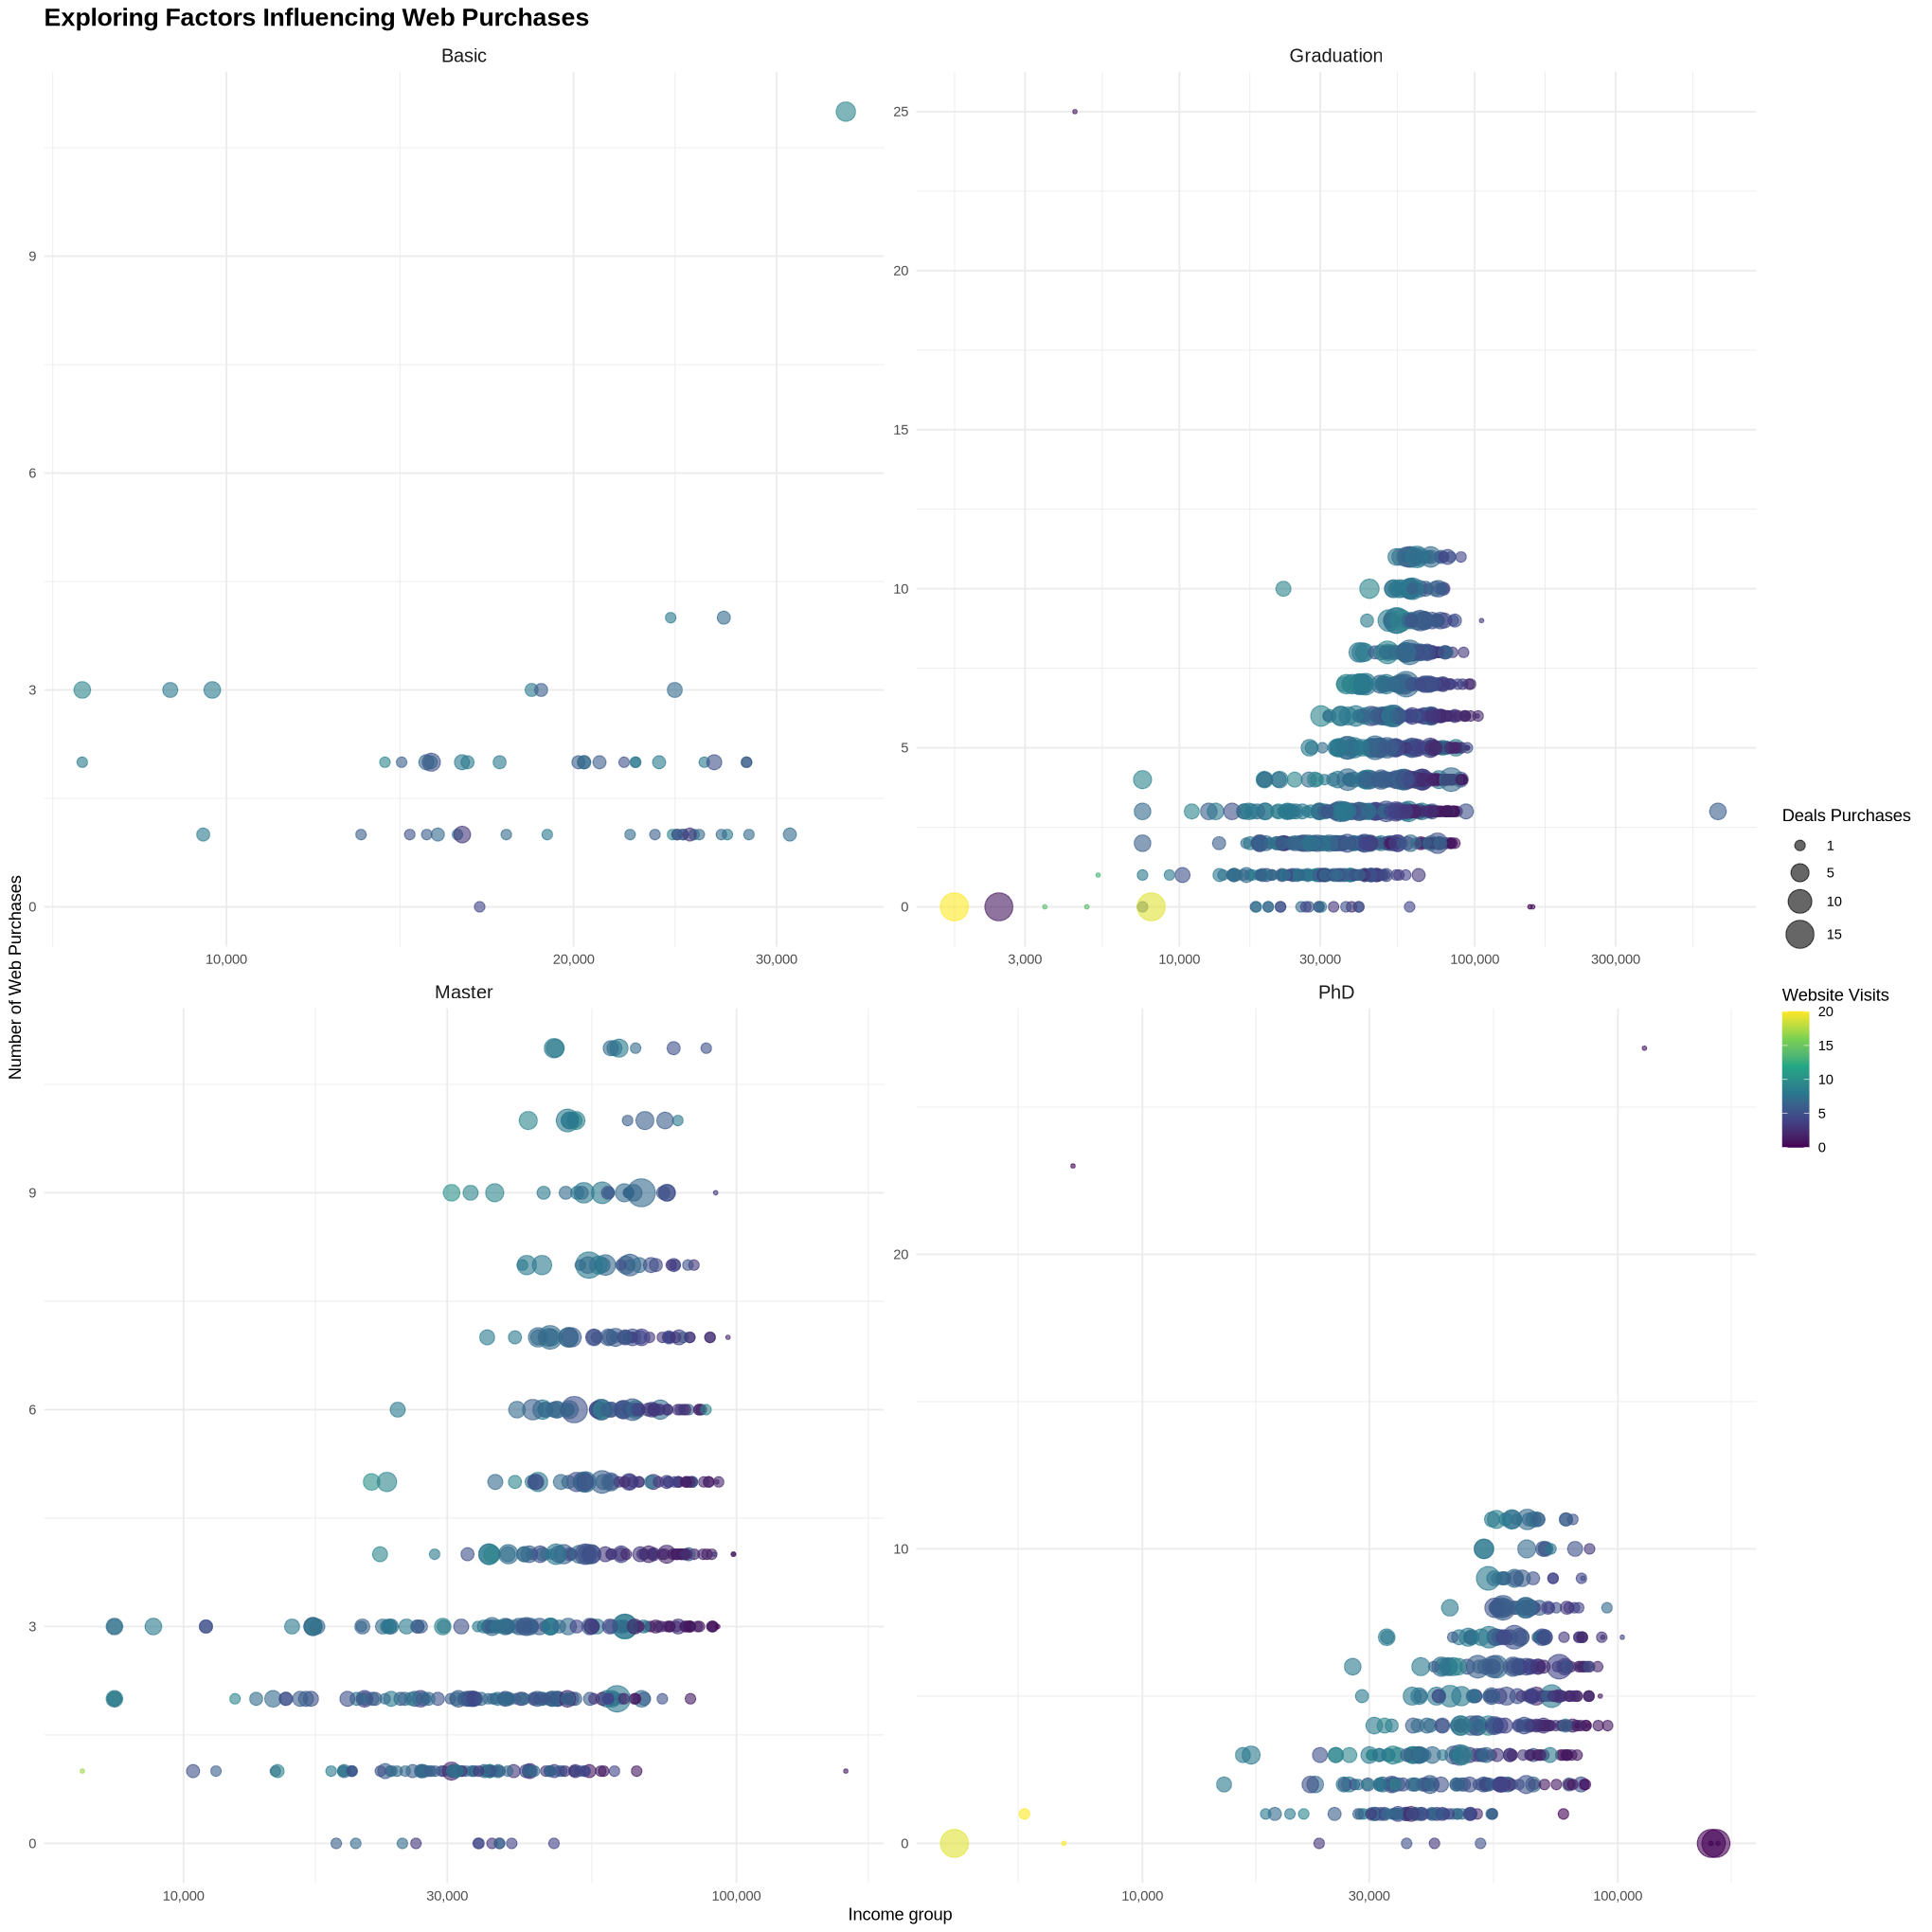

In [8]:
options(repr.plot.width = 17, repr.plot.height = 17)

ggplot(df, aes(x = Income, y = NumWebPurchases, 
               color = NumWebVisitsMonth, size = NumDealsPurchases)) +
  geom_point(alpha = 0.6) +  
  scale_x_log10(labels = scales::comma) +  
  scale_color_viridis_c(name = "Website Visits") +  
  scale_size_continuous(name = "Deals Purchases", breaks = c(1, 5, 10, 15), range = c(1, 8)) +  
  facet_wrap(~Education, ncol = 2, scales = "free") +  
  labs(
    title = "Exploring Factors Influencing Web Purchases",
    x = "Income group",
    y = "Number of Web Purchases",
    color = "Website Visits",
    size = "Deals Purchases"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    strip.text = element_text(size = 12),  
    plot.title = element_text(size = 16, face = "bold") 
  )

### Methods and Plan

#### Why is this Visualization relevant?
This plot is highly relevant to exploring the research question, as it visualizes how the explanatory variable impact response variable. The response variable in this study is NumWebPurchases, which represents count data. Poisson regression is specifically designed for modeling non-negative count-based outcomes, making it the most suitable method for this analysis.

1. Examines Multiple Variables at Once

- Income (X-axis): Displays income level correlates with web purchases.
- Number of Web Purchases (Y-axis): The response variable we are interested.
- Number of Website Visits (Color Gradient): Captures how frequently customers visit the website.
- Number of Deals Purchases (Point Size): Highlights customers who make purchases using discounts.
- Education (Facets): Splitting the data by education level.

2. Comparison Across Education Levels: By faceting the plot by Education, we can examine whether higher education levels influence online shopping habits.

3. Impact of Website Visits: The color gradient (brighter colors meaning more visits) helps show if frequent website visitors tend to buy more online.

4. Deals Purchases Influence: The size of points indicates how many purchases were made using deals, showing if discount-seekers are also frequent online shoppers.


#### Observaions
- Graduation and PhD holders show a concentration of customers with moderately high to high numbers of web purchases, suggesting education level may be associated with more frequent online shopping.
- Customers with more website visits (indicated by yellow/green points) often have lower web purchases, suggesting that frequent browsing does not necessarily lead to buying.
- Larger points clustering at higher web purchases (higher income group) suggest that people who purchase with deals tend to shop more online.
- Larger points (more deals purchases) are mostly concentrated in the mid-to-high range of web purchases.

#### Which assumptions are required, if any, to apply the method selected?
- The dependent variable (NumWebPurchases) must be a count variable.
- The mean and variance of response variable (`NumWebPurchases`) should be equal.
- Observations should be independent as customer’s purchases should not directly depend on another customer.
- Predictors should not be highly correlated, as this can make coefficient estimates unstable.

#### What are the potential limitations or weaknesses of the method selected?
- Poisson regression assumes that the mean and variance of the response variable are equal, but in real world, the variance is often greater than the mean (overdispersion), leading to underestimated standard errors and incorrect p-values.
- Repeated purchases from the same customer over time can violate observation independence
- If there are too many zero values in `NumWebPurchases`, poisson regression may overestimate the expected counts.
- Poisson regression only works with non-negative counts.

#### Why is this method appropriate?
Poisson regression is suitable for situations where the response variable represents count data, which in this case is NumWebPurchases. It enables us to understand how various predictors — such as Income, Education, NumDealsPurchases, and NumWebVisitsMonth — are statistically associated with the expected number of web purchases. 

Additionally, by incorporating interaction terms, the model allows us to investigate whether the association between income and online purchases differs across education levels, which is central to the research question. Since my goal is inference, Poisson regression is particularly useful for interpreting coefficient significance and direction of effects.

### Computational Code and Output

Based on the proposed Poisson model that I have list above, we will implement this model for our dataset.

In [9]:
# Split into training (70%) and testing (30%) sets
set.seed(20211130)

# Add temporary row ID
df <- df %>% mutate(row_id = row_number())

web_purchase_train <- 
    df %>% 
    slice_sample(prop = 0.7)

web_purchase_test <- 
    df %>% 
    anti_join(web_purchase_train,  by = "row_id")

In [10]:
# Fit Poisson model on training data
poisson_model_full <- glm(
  NumWebPurchases ~ Income + Education + NumDealsPurchases + NumWebVisitsMonth,
  data = web_purchase_train,
  family = poisson
)
poisson_model_full_results <- 
   poisson_model_full %>%
   tidy(conf.int = TRUE) %>%
   mutate(
    exp.estimate = exp(estimate),
    exp.conf.low = exp(conf.low),
    exp.conf.high = exp(conf.high)
  ) %>%
  mutate_if(is.numeric, round, 4)

poisson_model_full_results


term,estimate,std.error,statistic,p.value,conf.low,conf.high,exp.estimate,exp.conf.low,exp.conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.5678,0.1156,4.9130,0.0000,0.3342,0.7879,1.7644,1.3969,2.1987
Income,0.0000,0.0000,16.8739,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000
EducationGraduation,0.5283,0.1113,4.7450,0.0000,0.3171,0.7541,1.6961,1.3732,2.1258
EducationMaster,0.4894,0.1127,4.3435,0.0000,0.2754,0.7177,1.6314,1.3171,2.0497
EducationPhD,0.6012,0.1130,5.3226,0.0000,0.3866,0.8300,1.8243,1.4720,2.2933
NumDealsPurchases,0.0708,0.0056,12.7331,0.0000,0.0597,0.0815,1.0733,1.0616,1.0849
NumWebVisitsMonth,-0.0125,0.0056,-2.2352,0.0254,-0.0235,-0.0015,0.9876,0.9768,0.9985


#### Interpretation
- The intercept of the Poisson model is estimated at 0.5678, which corresponds to an expected number of web purchases of approximately 1.76 when all predictors are at their reference or baseline values (e.g., baseline education group, zero income, no deal purchases, and no web visits).
- Income shows a very small yet statistically significant positive association with the number of web purchases. Although the estimate rounds to 0.00, it has a very large test statistic (16.87) and a p-value below 0.001, indicating that even this tiny effect is consistently observed in the data.
- Education level is strongly associated with web purchasing behavior. All three education levels are highly significant (p < 0.001), suggesting a trend that the higher the education level, the more likely a customer is to engage in online purchases. 
- The number of purchases made using deals is also positively associated with web purchases. The exponentiated coefficient estimate of 1.0733, meaning that each additional deal-based purchase corresponds to a 7.3% increase in the expected number of web purchases. This relationship is highly significant and makes sense, as customers who actively respond to promotions may be more engaged in the company’s online purchasing system.
- The number of website visits in the last month (NumWebVisitsMonth) is negatively associated with web purchases. The coefficient is -0.0125, and the exponentiated value is 0.9876. This means that for each additional website visit, the expected number of web purchases decreases by approximately 1.2%. Though the effect size is small, it is statistically significant (p = 0.0254). A possible interpretation is that frequent visitors may include browsers who do not convert into buyers, suggesting that a high visit count doesn’t necessarily equate to high purchasing activity.

### Check for Overdispersion

In [11]:
summary(poisson_model_full)$deviance / summary(poisson_model_full)$df.residual

[1] 1.543343

In [12]:
quasi_model <- glm(
  NumWebPurchases ~ Income + Education + NumDealsPurchases + NumWebVisitsMonth,
  data = web_purchase_train,
  family = quasipoisson
)

summary(quasi_model)


Call:
glm(formula = NumWebPurchases ~ Income + Education + NumDealsPurchases + 
    NumWebVisitsMonth, family = quasipoisson, data = web_purchase_train)

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          5.678e-01  1.446e-01   3.928 8.96e-05 ***
Income               3.837e-06  2.845e-07  13.489  < 2e-16 ***
EducationGraduation  5.283e-01  1.393e-01   3.793 0.000154 ***
EducationMaster      4.894e-01  1.410e-01   3.472 0.000530 ***
EducationPhD         6.012e-01  1.413e-01   4.255 2.22e-05 ***
NumDealsPurchases    7.075e-02  6.951e-03  10.179  < 2e-16 ***
NumWebVisitsMonth   -1.253e-02  7.010e-03  -1.787 0.074164 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 1.564804)

    Null deviance: 2795.0  on 1547  degrees of freedom
Residual deviance: 2378.3  on 1541  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 10


- The dispersion parameter is estimated at 1.5648, which is consistent with the overdispersion ratio from the Poisson model.
- Income, education level, and deals purchases are significantly associated with web purchases.
- `NumWebVisitsMonth` is no longer significant (p = 0.074), which means the Poisson model likely overstated its importance due to underestimated standard errors.
- The quasi-Poisson model is a better choice for inference, as it corrects for this by adjusting standard errors.

#### Variable Selection Strategy: Backward Selection
Since the dataset contains many potential explanatory variables, not all of which may be relevant, I plan to use a backward selection algorithm. This approach will:

Begin with a full model that includes all candidate variables.
Iteratively remove the least significant predictors based on p-values, while keeping variables central to the research question.
I will divide the dataset into a training set (70%) and a testing set (30%), ensuring that variable selection and inference are not performed on the same data. This method reduces the risk of overfitting and enhances the generalizability of the final model. The selection will focus on minimizing AIC.

In [13]:
poisson_model_full_sel <- stepAIC(poisson_model_full, direction = "backward")

summary(poisson_model_full_sel)
AIC(poisson_model_full_sel)

Start:  AIC=7110.48
NumWebPurchases ~ Income + Education + NumDealsPurchases + NumWebVisitsMonth

                    Df Deviance    AIC
<none>                   2378.3 7110.5
- NumWebVisitsMonth  1   2383.3 7113.5
- Education          3   2415.9 7142.1
- NumDealsPurchases  1   2520.9 7251.1
- Income             1   2540.4 7270.6



Call:
glm(formula = NumWebPurchases ~ Income + Education + NumDealsPurchases + 
    NumWebVisitsMonth, family = poisson, data = web_purchase_train)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          5.678e-01  1.156e-01   4.913 8.97e-07 ***
Income               3.837e-06  2.274e-07  16.874  < 2e-16 ***
EducationGraduation  5.283e-01  1.113e-01   4.745 2.08e-06 ***
EducationMaster      4.894e-01  1.127e-01   4.344 1.40e-05 ***
EducationPhD         6.012e-01  1.130e-01   5.323 1.02e-07 ***
NumDealsPurchases    7.075e-02  5.557e-03  12.733  < 2e-16 ***
NumWebVisitsMonth   -1.253e-02  5.604e-03  -2.235   0.0254 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2795.0  on 1547  degrees of freedom
Residual deviance: 2378.3  on 1541  degrees of freedom
AIC: 7110.5

Number of Fisher Scoring iterations: 10


[1] 7110.475

- The backward selection process retained Income, Education, NumDealsPurchases, and NumWebVisitsMonth as the most informative predictors of web purchases.
- The final model achieved an AIC of 7110.5. Removing any of the retained variables would increased the AIC
- All included variables are statistically significant at the 5% level.

#### Focus on Inference
The project’s primary focus is inference, aiming to determine whether variables such as income, education, web visits, and deals purchases are significantly associated with web purchases. I will perform statistical hypothesis tests for each coefficient using a significance level of α = 0.05. This will involve setting up:

Null Hypothesis (H₀): The predictor has no effect on the response.
Alternative Hypothesis (H₁): The predictor is significantly associated with the response.
By examining p-values, I will determine which variables contribute meaningfully to the model. Additionally, I will explore interaction effects, such as whether the influence of income on web purchases varies across different education levels.